<a href="https://colab.research.google.com/github/cynthiiaa/MathStats/blob/main/RandomGeneratorMetropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

dtype = np.float32

target = tfd.Logistic(loc=dtype(0), scale=dtype(1))

def metropolisGenerator(n=1000):
  samples = tfp.mcmc.sample_chain(
    num_results=n,
    current_state=dtype(1),
    kernel=tfp.mcmc.RandomWalkMetropolis(target.log_prob),
    num_burnin_steps=1,
    return_final_kernel_results=False,
    trace_fn=None,
    seed=None)
  return samples.numpy()


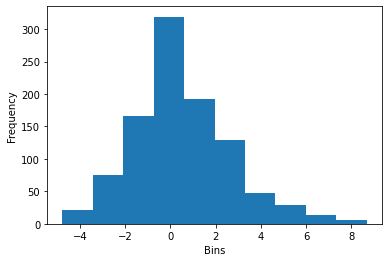

In [2]:
import matplotlib.pyplot as plt

samples_1000 = metropolisGenerator()

plt.hist(samples_1000)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [3]:
samples_100 = metropolisGenerator(100)
samples_10000 = metropolisGenerator(10000)
samples_100000 = metropolisGenerator(100000)

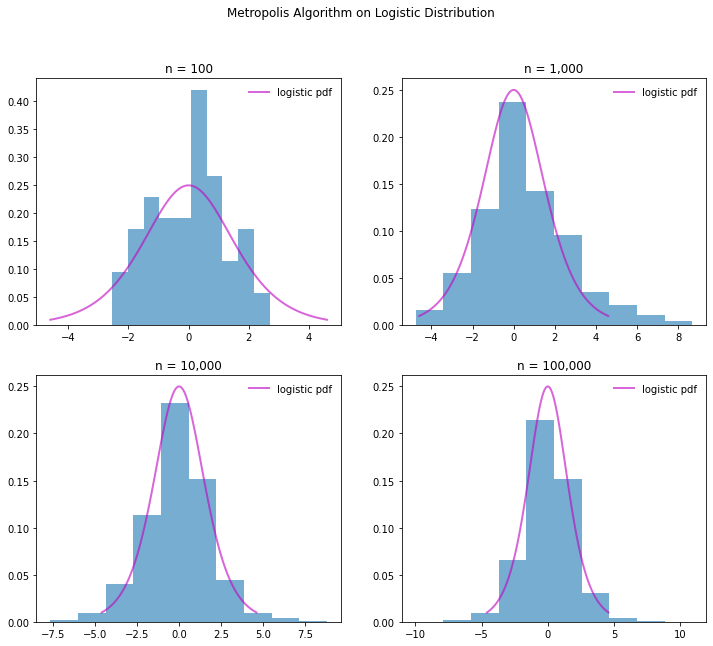

In [4]:
from scipy.stats import logistic
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# n = 100
x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
axs[0, 0].plot(x, logistic.pdf(x),'m-', lw=2, alpha=0.6, label='logistic pdf')
axs[0,0].hist(samples_100, density=True, histtype='stepfilled', alpha=0.6)
axs[0,0].legend(loc='best', frameon=False)
axs[0, 0].set_title('n = 100')

# n = 1000
x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
axs[0, 1].plot(x, logistic.pdf(x),'m-', lw=2, alpha=0.6, label='logistic pdf')
axs[0,1].hist(samples_1000, density=True, histtype='stepfilled', alpha=0.6)
axs[0,1].legend(loc='best', frameon=False)
axs[0, 1].set_title('n = 1,000')

# n = 10000
x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
axs[1, 0].plot(x, logistic.pdf(x),'m-', lw=2, alpha=0.6, label='logistic pdf')
axs[1,0].hist(samples_10000, density=True, histtype='stepfilled', alpha=0.6)
axs[1,0].legend(loc='best', frameon=False)
axs[1, 0].set_title('n = 10,000')

# n = 100000
x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
axs[1, 1].plot(x, logistic.pdf(x),'m-', lw=2, alpha=0.6, label='logistic pdf')
axs[1,1].hist(samples_100000, density=True, histtype='stepfilled', alpha=0.6)
axs[1,1].legend(loc='best', frameon=False)
axs[1, 1].set_title('n = 100,000')

fig.suptitle("Metropolis Algorithm on Logistic Distribution")
plt.show()